In [36]:
%%bash

"""
Download the dataset if it's not already there

Dataset: Amazon Reviews for Home and Kitchen Appliances

Paper: Justifying recommendations using distantly-labeled reviews and fined-grained aspects
Jianmo Ni, Jiacheng Li, Julian McAuley
Empirical Methods in Natural Language Processing (EMNLP), 2019

"""


if [ ! -f "./Appliances.json" ]; then
    curl "https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/categoryFiles/Appliances.json.gz" | gunzip > Appliances.json
else
    echo "Dataset already downloaded."
fi


bash: line 11: 
Download the dataset if it's not already there

Dataset: Amazon Reviews for Home and Kitchen Appliances

Paper: Justifying recommendations using distantly-labeled reviews and fined-grained aspects
Jianmo Ni, Jiacheng Li, Julian McAuley
Empirical Methods in Natural Language Processing (EMNLP), 2019

: command not found


Dataset already downloaded.


In [37]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

In [38]:
df_raw = pd.read_json("Appliances.json", lines=True)

In [39]:
memuse = df_raw.memory_usage(deep=True).sum() / 1024**2
print(f"Memory usage before Data Cleaning: {memuse:.2f} MB")

Memory usage before Data Cleaning: 430.16 MB


In [40]:
# Data Cleaning

# drop columns that are not needed and drop rows with missing values
df = df_raw.drop(['verified', 'reviewTime', 'reviewerID', 'asin', 'style', 'reviewerName', 'unixReviewTime', 'vote', 'image'], axis=1).dropna()

# convert the text columns to string
df["reviewText"] = df["reviewText"].astype("string")
df["summary"] = df["summary"].astype("string")

# convert the overall column [1-5] to uint8 
df["overall"] = df["overall"].astype("uint8")

In [41]:
memuse_clean = df.memory_usage(deep=True).sum() / 1024**2
print(f"Memory usage after Data Cleaning: {memuse_clean:.2f} MB")

Memory usage after Data Cleaning: 192.62 MB


In [42]:
df.head()

,overall,reviewText,summary
0,5,Not one thing in this book seemed an obvious o...,Clear on what leads to innovation
1,5,I have enjoyed Dr. Alan Gregerman's weekly blo...,Becoming more innovative by opening yourself t...
2,5,Alan Gregerman believes that innovation comes ...,The World from Different Perspectives
3,5,"Alan Gregerman is a smart, funny, entertaining...",Strangers are Your New Best Friends
4,5,"As I began to read this book, I was again remi...","How and why it is imperative to engage, learn ..."


/var/folders/3g/xl748sgd3ljgqvnxwbdt3vn80000gn/T/ipykernel_5488/3033069696.py:2: FutureWarning: `sort_columns` is deprecated and will be removed in a future version.
  df["overall"].value_counts().plot(kind="bar", title="Distribution of Overall Rating", xlabel="Rating", ylabel="Count", rot=0, sort_columns=True)


<Axes: title={'center': 'Distribution of Overall Rating'}, xlabel='Rating', ylabel='Count'>

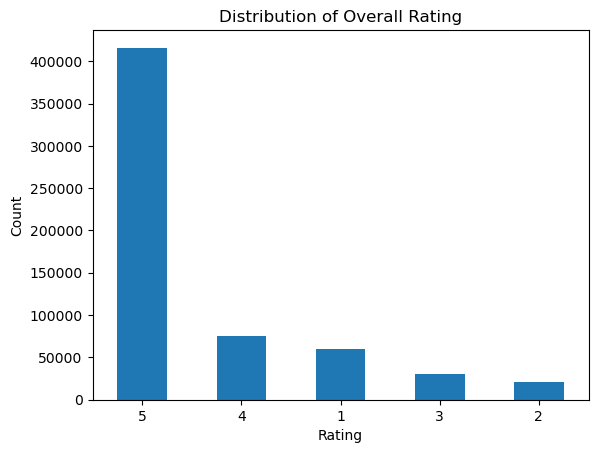

In [43]:
# plot the distribution of the overall rating, we can see that the dataset is imbalanced
df["overall"].value_counts().plot(kind="bar", title="Distribution of Overall Rating", xlabel="Rating", ylabel="Count", rot=0, sort_columns=True)

/var/folders/3g/xl748sgd3ljgqvnxwbdt3vn80000gn/T/ipykernel_5488/1781214441.py:6: FutureWarning: `sort_columns` is deprecated and will be removed in a future version.
  rdf["overall"].value_counts().plot(kind="bar", title="Distribution of Overall Rating", xlabel="Rating", ylabel="Count", rot=0, sort_columns=True)


<Axes: title={'center': 'Distribution of Overall Rating'}, xlabel='Rating', ylabel='Count'>

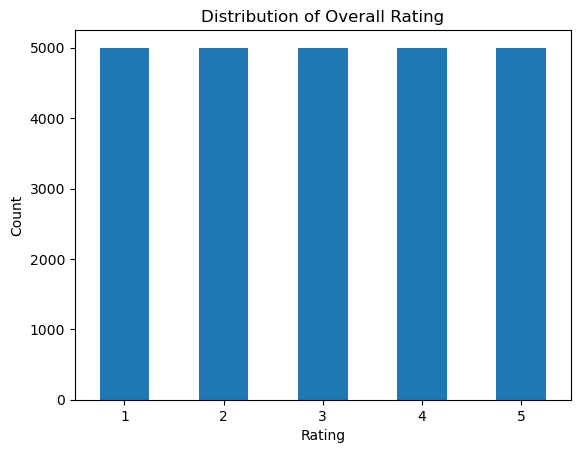

In [44]:
# create a balanced dataset by sampling 5000 reviews from each rating

rdf = df.groupby("overall").apply(lambda x: x.sample(n=5000, random_state=42)).reset_index(drop=True)

# plot the distribution of the overall rating, we can see that the dataset is balanced
rdf["overall"].value_counts().plot(kind="bar", title="Distribution of Overall Rating", xlabel="Rating", ylabel="Count", rot=0, sort_columns=True)


In [45]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# download the nltk packages
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# create a lemmatizer
lemmatizer = WordNetLemmatizer()

# create a list of stop words
stop_words = stopwords.words('english')

for str_col in ["reviewText", "summary"]:

  # create a list of texts
  texts = rdf[str_col].tolist()

  # tokenize the texts
  tokenized_texts = [word_tokenize(text) for text in texts]

  # remove stop words and lemmatize the tokens

  lemmatized_texts = [[lemmatizer.lemmatize(token.lower()) for token in text if token.lower() not in stop_words] for text in tokenized_texts]

  # join the tokens back to text
  joined_texts = [" ".join(text) for text in lemmatized_texts]

  # create a new column for the cleaned text
  rdf[f"{str_col}_cleaned"] = joined_texts

[nltk_data] Downloading package punkt to /Users/rmn/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/rmn/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/rmn/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/rmn/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [46]:
rdf.head(1)

,overall,reviewText,summary,reviewText_cleaned,summary_cleaned
0,1,This software is buggy. I can't understand wh...,This software is buggy. I can't understand why...,software buggy . ca n't understand need compli...,software buggy . ca n't understand ...
